In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
from datetime import datetime, timedelta
import datetime
import time
%matplotlib inline

//anaconda/envs/mypy27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Compare the weeks where neighboring weeks' DST differ

Attempt to isolate effect of DST by using the first and last weeks of DST as our sample and their neighboring non-DST weeks as the control.

In [29]:
dst_df = pd.read_csv('dst_wk_day.out', header=None)
dst_df = dst_df.rename(index=str, columns={0: 'Type', 1: 'date', 2: 'weekday', 3: 'dst', 4: 'crimes'})
dst_df.Type = dst_df.Type.str.strip(to_strip = "(").str.strip(to_strip = "'")
dst_df.date = pd.to_datetime(dst_df.date.str.strip().str.strip(to_strip = "'"),infer_datetime_format=True)
dst_df.dst = pd.to_numeric(dst_df.dst.str.strip(to_strip = ")"))
dst_df.crimes = pd.to_numeric(dst_df.crimes.str.strip(to_strip = ")"))

dst_df = dst_df[dst_df.weekday >= 0]
dst_df = dst_df[dst_df.dst >= 0]
dst_df = dst_df[dst_df.date >= datetime.date(2006,1,1)]
dst_df = dst_df.sort(columns='date')
dst_df.head()


/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Type,date,weekday,dst,crimes
136,FELONY,2006-03-27,0,0,466
600,MISDEMEANOR,2006-03-27,0,0,815
993,VIOLATION,2006-03-27,0,0,223
604,MISDEMEANOR,2006-03-28,1,0,833
139,FELONY,2006-03-28,1,0,476


In [30]:
table_nodst = dst_df[dst_df.dst==0].pivot_table(values='crimes', index=['date'], columns=['Type'], aggfunc=np.sum)
table_dst = dst_df[dst_df.dst==1].pivot_table(values='crimes', index=['date'], columns=['Type'], aggfunc=np.sum)

In [45]:
table_nodst.head(5)

Type,FELONY,MISDEMEANOR,VIOLATION
date,,,
2006-03-27,466,815,223
2006-03-28,476,833,195
2006-03-29,467,823,178
2006-03-30,466,800,174
2006-03-31,475,807,199


In [44]:
table_dst.head(5)

Type,FELONY,MISDEMEANOR,VIOLATION
date,,,
2006-04-03,396,762,221
2006-04-04,477,854,184
2006-04-05,455,857,188
2006-04-06,484,880,215
2006-04-07,556,872,208


In [43]:
types_dst_diff = table_dst.values - table_nodst.values
print '          F     M     V'
types_dst_diff

          F     M     V


array([[ -70,  -53,   -2],
       [   1,   21,  -11],
       [ -12,   34,   10],
       [  18,   80,   41],
       [  81,   65,    9],
       [-129, -240,  -22],
       [ -27,   -2,  -36],
       [  42,  -62,   35],
       [ -90,  -91,  -35],
       [-147, -269,  -71],
       [ -11,   62,  -16],
       [ -26,  103,   -2],
       [  79,  -20,   -8],
       [   4,  107,    2],
       [  32,   80,   28],
       [ 119,  200,   26],
       [  69,   89,   40],
       [  38,   79,   32],
       [-107, -227,   -7],
       [-144, -270,  -45],
       [ -25,  -44,   -9],
       [ -42,  -61,  -15],
       [   7,  100,   49],
       [  85,  110,   28],
       [ 130,  243,   57],
       [ -27,   70,   22],
       [ -18,   26,   21],
       [   0,   10,   32],
       [ -18,   57,    3],
       [ -17,   17,   13],
       [ -31,   67,   15],
       [  52, -122,   30],
       [  28,  -42,   -1],
       [ 101,  -19,   47],
       [ -38,   31,    9],
       [  20,   36,    2],
       [   1,  -32,   -5],
 

In [40]:
scipy.stats.ttest_1samp(types_dst_diff, 0, axis=0)

Ttest_1sampResult(statistic=array([ 2.88537778,  2.43311539,  4.33382588]), pvalue=array([  4.53352539e-03,   1.62399389e-02,   2.79208360e-05]))

#### Conclusion: All crime types seems to be significantly higher on DST weeks than non-DST weeks when factoring in year, season and weekday

#### Plotting the differences in crime counts for test vs. control for different crime types

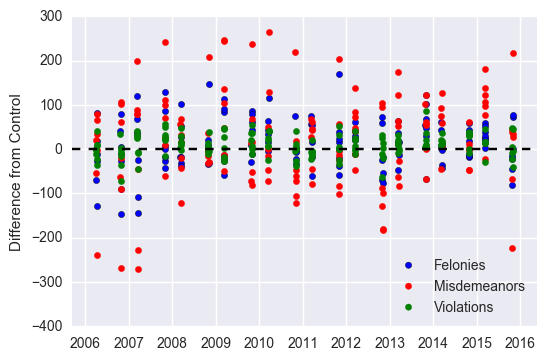

In [65]:
plt.scatter(table_dst.index, types_dst_diff[:,0], label='Felonies')
plt.scatter(table_dst.index, types_dst_diff[:,1], label='Misdemeanors', color='r')
plt.scatter(table_dst.index, types_dst_diff[:,2], label='Violations', color='g')
plt.axhline(y=0,color='k', linestyle='--')
plt.ylabel('Difference from Control')
plt.legend(loc=4)

### Testing DST's effect on crime at the borough level

In [76]:
dst_df_boro = pd.read_csv('dst_wk_day_boro.out', header=None)
dst_df_boro = dst_df_boro.rename(index=str, columns={0: 'boro', 1: 'date', 2: 'weekday', 3: 'dst', 4: 'crimes'})
dst_df_boro.boro = dst_df_boro.boro.str.strip(to_strip = "(").str.strip(to_strip = "'")
dst_df_boro.date = pd.to_datetime(dst_df_boro.date.str.strip().str.strip(to_strip = "'"),infer_datetime_format=True)
dst_df_boro.dst = pd.to_numeric(dst_df_boro.dst.str.strip(to_strip = ")"))
dst_df_boro.crimes = pd.to_numeric(dst_df_boro.crimes.str.strip(to_strip = ")"))

dst_df_boro = dst_df_boro[dst_df_boro.weekday >= 0]
dst_df_boro = dst_df_boro[dst_df_boro.dst >= 0]
dst_df_boro = dst_df_boro[dst_df_boro.date >= datetime.date(2006,1,1)]
dst_df_boro = dst_df_boro.sort(columns='date')
dst_df_boro = dst_df_boro[dst_df_boro.boro != '']
dst_df_boro.head()

/anaconda/envs/mypy27/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,boro,date,weekday,dst,crimes
159,BRONX,2006-03-27,0,0,372
556,BROOKLYN,2006-03-27,0,0,428
1350,QUEENS,2006-03-27,0,0,298
970,MANHATTAN,2006-03-27,0,0,326
1726,STATEN ISLAND,2006-03-27,0,0,77


In [79]:
table_nodst_boro = dst_df_boro[dst_df_boro.dst==0].pivot_table(values='crimes', index=['date'], columns=['boro'], aggfunc=np.sum)
table_dst_boro = dst_df_boro[dst_df_boro.dst==1].pivot_table(values='crimes', index=['date'], columns=['boro'], aggfunc=np.sum)

In [89]:
boros_dst_diff = table_dst_boro.values - table_nodst_boro.values
print '          BX    BK    MN    QN    SI'
boros_dst_diff

          BX    BK    MN    QN    SI


array([[ -77,  -13,  -17,   -7,   -9],
       [  47,   -8,  -12,  -10,   -7],
       [  41,  -44,    7,    5,   23],
       [  59,   31,   13,   31,    5],
       [  14,   53,   61,   41,  -18],
       [ -68,  -95,  -85, -113,  -26],
       [  10,  -48,   12,  -37,   -1],
       [  15,  -47,   46,    3,   -2],
       [  26,  -99,   -4, -107,  -32],
       [-134, -109, -109,  -99,  -36],
       [  17,   13,  -11,    9,    7],
       [  56,   62,    9,  -37,  -15],
       [  30,   39,   15,  -22,  -11],
       [  77,   28,   49,  -47,    6],
       [  24,   39,   78,    2,   -3],
       [  85,   87,  112,   53,    8],
       [  76,   54,   53,   13,    2],
       [  77,   47,   11,    0,   14],
       [ -97,  -81,  -69,  -69,  -25],
       [ -44, -155, -147,  -71,  -42],
       [  -8,  -71,    5,    6,  -10],
       [ -43,   43,  -40,  -53,  -25],
       [  47,   66,  -10,   26,   27],
       [  -6,   85,   44,   67,   33],
       [  60,  113,   97,  129,   31],
       [ -10,   90,  -21,

In [90]:
scipy.stats.ttest_1samp(boros_dst_diff, 0, axis=0)

Ttest_1sampResult(statistic=array([ 3.15515903,  3.0167789 ,  1.24868891,  2.63955037,  3.08562669]), pvalue=array([ 0.00196668,  0.00303896,  0.21387786,  0.00924991,  0.0024517 ]))

Conclusion: We can reject the null hypothesis that there is no affect of DST on crime in all boroughs except Manhattan, as all of the other 4 boroughs have higher crime rates on test days (DST) compared with control days (Non-DST)